In [89]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://data.cityofnewyork.us/resource/t29m-gskq.json'
ny_2018 = requests.get(url).json()

In [20]:
ny2018_frame = pd.json_normalize(ny_2018)

In [21]:
ny2018_frame.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2084-11-04T12:32:24.000,2084-11-04T12:47:41.000,1,1.34,1,N,238,236,2,10,0,0.5,0,0,0.3,10.8
1,2,2084-11-04T12:32:24.000,2084-11-04T12:47:41.000,1,1.34,1,N,238,236,2,10,0,0.5,0,0,0.3,10.8
2,2,2084-11-04T12:25:53.000,2084-11-04T12:29:00.000,1,0.32,1,N,238,238,2,4,0,0.5,0,0,0.3,4.8
3,2,2084-11-04T12:25:53.000,2084-11-04T12:29:00.000,1,0.32,1,N,238,238,2,4,0,0.5,0,0,0.3,4.8
4,2,2084-11-04T12:08:33.000,2084-11-04T12:22:24.000,1,1.85,1,N,236,238,2,10,0,0.5,0,0,0.3,10.8


In [10]:
ny2018_frame.shape


(1000, 17)

In [112]:
nyc_set = pd.read_csv("/home/russell/Downloads/2018_Yellow_Taxi_Trip_Data.csv", nrows=1000000)
ex_set = pd.read_csv("/home/russell/Downloads/2018_Yellow_Taxi_Trip_Data.csv", nrows=10000)

In [113]:
ex_set.to_csv(r'/home/russell/Downloads/exampleNYset.csv', index = False) #export sample dataset to csv

In [109]:
nyc_set['tip_amount'].describe()

count    1000000.000000
mean           1.902468
std            2.571050
min           -1.260000
25%            0.000000
50%            1.450000
75%            2.520000
max          210.220000
Name: tip_amount, dtype: float64

In [108]:
nyc_set = nyc_set[~nyc_set.isin([np.nan, np.inf, -np.inf]).any(1)]

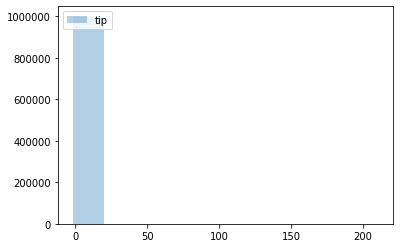

In [110]:
bins = np.linspace(0, 20, 5)
plt.hist(nyc_set.tip_amount, alpha=0.35,label='tip')
plt.legend(loc='upper left')
plt.show()

In [111]:
log_tips = np.log(nyc_set['tip_amount'])
log_tips.describe()

count    9.999960e+05
mean             -inf
std               NaN
min              -inf
25%              -inf
50%      3.715636e-01
75%      9.242589e-01
max      5.348155e+00
Name: tip_amount, dtype: float64

In [100]:
log_tips.plot.hist(bins=20) #that gives us a better sense of the distribution of $

ValueError: autodetected range of [-inf, 5.348154601395208] is not finite